In [17]:
import xarray as xr
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [18]:
df = pd.read_csv('/home/links/ct715/eddy_feedback/z_csv/pamip_efp_values.csv', index_col=0)
df['NA_jet_shift'] = np.nan
df['NP_jet_shift'] = np.nan
df

,Model,NH EFP,SH EFP,NA_jet_shift,NP_jet_shift
0,CESM1-WACCM-SC,0.1446,0.0308,NaN,NaN
1,CESM2,0.4213,0.3803,NaN,NaN
2,CNRM-CM6-1,0.2819,0.2549,NaN,NaN
3,CanESM5,0.4516,0.4917,NaN,NaN
4,E3SMv1,0.0584,0.0598,NaN,NaN
5,EC-EARTH3,0.3538,0.3699,NaN,NaN
6,ECHAM6.3,0.0142,0.0106,NaN,NaN
7,FGOALS-f3-L,0.2688,0.1548,NaN,NaN
8,HadGEM3-GC31-LL,0.3216,0.3496,NaN,NaN
9,HadGEM3-GC31-MM,0.3807,0.3705,NaN,NaN


In [19]:
hay = {}
path = Path('/home/links/ct715/data_storage/given_data/EDJ_Steph_Hay')
file_list = list(path.glob('Jetmon*.nc'))

for file in file_list:
    
    # extract model name for each file and import data
    model_name = file.name.split('_')[2]
    print(model_name)
    dataset = xr.open_mfdataset(
        str(file)
    )
    
    if model_name == 'WACCM':
        waccm = dataset
        dataset = dataset.isel(time=slice(0,-3))
    elif model_name == 'FGOALS':
        fgoals = dataset
        dataset = dataset.isel(time=slice(0,-3))
        
    
    # calculate jet shifts
    dataset['NA_jet_shift'] = - dataset['NAjetmon_pos_pd'] + dataset['NAjetmon_pos_futSIC']
    dataset['NP_jet_shift'] = - dataset['NPjetmon_pos_pd'] + dataset['NPjetmon_pos_futSIC']
    
    # subset to required variables
    var_list = ['NA_jet_shift', 'NP_jet_shift']
    dataset = dataset[var_list]
    
    
    hay[model_name] = dataset.mean('time')

Can
Nor
E3SM
WACCM
FGOALS
IPSL
MIROC
Had
Tai
AWI
CESM
CNRM
ECEarth


In [20]:
df.loc[df["Model"] == "CESM2", "NA_jet_shift"] = hay['CESM'].NA_jet_shift
df.loc[df["Model"] == "CESM2", "NP_jet_shift"] = hay['CESM'].NP_jet_shift

df.loc[df["Model"] == "CanESM5", "NA_jet_shift"] = hay['Can'].NA_jet_shift
df.loc[df["Model"] == "CanESM5", "NP_jet_shift"] = hay['Can'].NP_jet_shift

df.loc[df["Model"] == "CESM1-WACCM-SC", "NA_jet_shift"] = hay['WACCM'].NA_jet_shift
df.loc[df["Model"] == "CESM1-WACCM-SC", "NP_jet_shift"] = hay['WACCM'].NP_jet_shift

df.loc[df["Model"] == "NorESM2-LM", "NA_jet_shift"] = hay['Nor'].NA_jet_shift
df.loc[df["Model"] == "NorESM2-LM", "NP_jet_shift"] = hay['Nor'].NP_jet_shift

df.loc[df["Model"] == "E3SMv1", "NA_jet_shift"] = hay['E3SM'].NA_jet_shift
df.loc[df["Model"] == "E3SMv1", "NP_jet_shift"] = hay['E3SM'].NP_jet_shift

df.loc[df["Model"] == "FGOALS-f3-L", "NA_jet_shift"] = hay['FGOALS'].NA_jet_shift
df.loc[df["Model"] == "FGOALS-f3-L", "NP_jet_shift"] = hay['FGOALS'].NP_jet_shift

df.loc[df["Model"] == "IPSL-CM6A-LR", "NA_jet_shift"] = hay['IPSL'].NA_jet_shift
df.loc[df["Model"] == "IPSL-CM6A-LR", "NP_jet_shift"] = hay['IPSL'].NP_jet_shift

df.loc[df["Model"] == "MIROC6", "NA_jet_shift"] = hay['MIROC'].NA_jet_shift
df.loc[df["Model"] == "MIROC6", "NP_jet_shift"] = hay['MIROC'].NP_jet_shift

df.loc[df["Model"] == "HadGEM3-GC31-MM", "NA_jet_shift"] = hay['Had'].NA_jet_shift
df.loc[df["Model"] == "HadGEM3-GC31-MM", "NP_jet_shift"] = hay['Had'].NP_jet_shift

df.loc[df["Model"] == "CNRM-CM6-1", "NA_jet_shift"] = hay['CNRM'].NA_jet_shift
df.loc[df["Model"] == "CNRM-CM6-1", "NP_jet_shift"] = hay['CNRM'].NP_jet_shift

df.loc[df["Model"] == "EC-EARTH3", "NA_jet_shift"] = hay['ECEarth'].NA_jet_shift
df.loc[df["Model"] == "EC-EARTH3", "NP_jet_shift"] = hay['ECEarth'].NP_jet_shift

In [21]:
df = df.dropna()
df = df.drop(columns=['SH EFP'])
df

,Model,NH EFP,NA_jet_shift,NP_jet_shift
0,CESM1-WACCM-SC,0.1446,-0.513290,-0.302059
1,CESM2,0.4213,-0.274869,-0.190052
2,CNRM-CM6-1,0.2819,-0.726837,-0.337738
3,CanESM5,0.4516,-0.527100,-0.365872
4,E3SMv1,0.0584,-0.293333,-0.026667
5,EC-EARTH3,0.3538,-0.177777,-0.325145
7,FGOALS-f3-L,0.2688,-0.996633,-0.087542
9,HadGEM3-GC31-MM,0.3807,-0.814197,-0.094444
10,IPSL-CM6A-LR,0.3090,-0.591549,0.025352
11,MIROC6,0.2578,-0.499602,-0.158753


In [24]:
df = df[df["Model"] != "CESM1-WACCM-SC"]
# df = df[df["Model"] != "FGOALS-f3-L"]
df = df[df["Model"] != "E3SMv1"]
# df = df[df["Model"] != "NorESM2-LM"]
df

,Model,NH EFP,NA_jet_shift,NP_jet_shift
1,CESM2,0.4213,-0.274869,-0.190052
2,CNRM-CM6-1,0.2819,-0.726837,-0.337738
3,CanESM5,0.4516,-0.527100,-0.365872
5,EC-EARTH3,0.3538,-0.177777,-0.325145
7,FGOALS-f3-L,0.2688,-0.996633,-0.087542
9,HadGEM3-GC31-MM,0.3807,-0.814197,-0.094444
10,IPSL-CM6A-LR,0.3090,-0.591549,0.025352
11,MIROC6,0.2578,-0.499602,-0.158753
12,NorESM2-LM,0.3539,-0.704211,0.420000


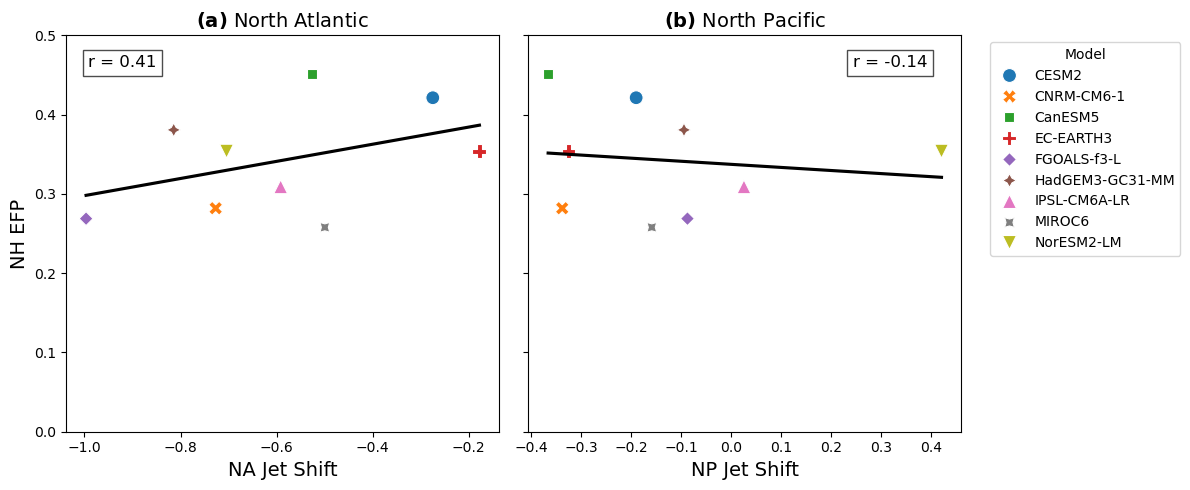

In [25]:
# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)  # 1 row, 2 columns

# Function to compute and add Pearson correlation
def add_correlation(ax, x, y, xc=0.05, yc=0.95):
    corr, _ = pearsonr(x, y)  # Compute Pearson correlation
    ax.text(xc, yc, f"r = {corr:.2f}", transform=ax.transAxes, 
            fontsize=12, verticalalignment="top", bbox=dict(facecolor="white", alpha=0.7))

# First plot: NH EFP vs. NA jet shift
sns.scatterplot(y=df["NH EFP"], x=df["NA_jet_shift"], hue=df["Model"], style=df["Model"], ax=axes[0], s=100)
sns.regplot(y=df["NH EFP"], x=df["NA_jet_shift"], scatter=False, ax=axes[0], color="black", ci=None)  # No confidence interval
axes[0].set_title("$\\bf{(a)}$ North Atlantic", fontsize=14)
axes[0].set_ylabel("NH EFP", fontsize=14)
axes[0].set_xlabel("NA Jet Shift", fontsize=14)
axes[0].set_ylim(0,0.5)
axes[0].get_legend().remove()  # Remove legend from first plot
add_correlation(axes[0], df["NH EFP"], df["NA_jet_shift"])  # Add Pearson correlation

# Second plot: NH EFP vs. NP jet shift
sns.scatterplot(y=df["NH EFP"], x=df["NP_jet_shift"], hue=df["Model"], style=df["Model"], ax=axes[1], s=100)
sns.regplot(y=df["NH EFP"], x=df["NP_jet_shift"], scatter=False, ax=axes[1], color="black", ci=None)  # No confidence interval
axes[1].set_title("$\\bf{(b)}$ North Pacific", fontsize=14)
# axes[1].set_ylabel("NH EFP")
axes[1].set_xlabel("NP Jet Shift", fontsize=14)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc="upper left", title='Model')  # Move legend outside
add_correlation(axes[1], df["NH EFP"], df["NP_jet_shift"], xc=0.75)  # Add Pearson correlation

plt.tight_layout()
plt.savefig('./plots/jet_shift_efp.png', dpi=300, bbox_inches='tight')
plt.show()